# Exercises for Lecture 12 (Introduction to Keras)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-01-10 00:22:37


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

2024-01-10 00:22:38.147562: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:22:38.198623: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:22:38.199620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-01-10 00:22:39.034326: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Consider the California housing regression dataset again.

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

Split the data into training, validation and test sets.

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Scale features to standardise.

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Exercise 1: Build a regression model using the Sequential API

Build a sequential model to estimate house prices with one hidden layer with 30 neurons and a ReLU activation function.

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

Compile the model with a mean squared error loss fucntion and a SGD optimiser with a learning rate of 1e-3.

In [7]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4))

Fit the model over 20 epochs, evaluting it on the validation data during training.

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


  1/363 [..............................] - ETA: 1:42 - loss: 4.5823

 62/363 [====>.........................] - ETA: 0s - loss: 4.0244  

117/363 [========>.....................] - ETA: 0s - loss: 4.0140

176/363 [=============>................] - ETA: 0s - loss: 3.9307

239/363 [==================>...........] - ETA: 0s - loss: 3.7573

300/363 [=======================>......] - ETA: 0s - loss: 3.6493

360/363 [============================>.] - ETA: 0s - loss: 3.5496

363/363 [==============================] - 1s 1ms/step - loss: 3.5459 - val_loss: 4.0470


Epoch 2/20


  1/363 [..............................] - ETA: 0s - loss: 2.5713

 64/363 [====>.........................] - ETA: 0s - loss: 3.0804

124/363 [=========>....................] - ETA: 0s - loss: 2.9479

187/363 [==============>...............] - ETA: 0s - loss: 2.8522

249/363 [===================>..........] - ETA: 0s - loss: 2.7990

314/363 [========================>.....] - ETA: 0s - loss: 2.7234

363/363 [==============================] - 0s 1ms/step - loss: 2.6996 - val_loss: 3.9596


Epoch 3/20


  1/363 [..............................] - ETA: 0s - loss: 1.9915

 54/363 [===>..........................] - ETA: 0s - loss: 2.3206

106/363 [=======>......................] - ETA: 0s - loss: 2.3022

166/363 [============>.................] - ETA: 0s - loss: 2.2980

227/363 [=================>............] - ETA: 0s - loss: 2.1775

289/363 [======================>.......] - ETA: 0s - loss: 2.1315

350/363 [===========================>..] - ETA: 0s - loss: 2.1236

363/363 [==============================] - 0s 1ms/step - loss: 2.1159 - val_loss: 3.8031


Epoch 4/20


  1/363 [..............................] - ETA: 1s - loss: 0.8130

 66/363 [====>.........................] - ETA: 0s - loss: 1.8190

131/363 [=========>....................] - ETA: 0s - loss: 1.7677

196/363 [===============>..............] - ETA: 0s - loss: 1.7740

258/363 [====================>.........] - ETA: 0s - loss: 1.7398

318/363 [=========================>....] - ETA: 0s - loss: 1.6847

363/363 [==============================] - 0s 1ms/step - loss: 1.7091 - val_loss: 3.5059


Epoch 5/20


  1/363 [..............................] - ETA: 0s - loss: 2.0787

 65/363 [====>.........................] - ETA: 0s - loss: 1.5601

122/363 [=========>....................] - ETA: 0s - loss: 1.5148

183/363 [==============>...............] - ETA: 0s - loss: 1.5013

244/363 [===================>..........] - ETA: 0s - loss: 1.4598

306/363 [========================>.....] - ETA: 0s - loss: 1.4509

363/363 [==============================] - 0s 1ms/step - loss: 1.4230 - val_loss: 3.1168


Epoch 6/20


  1/363 [..............................] - ETA: 0s - loss: 0.7654

 66/363 [====>.........................] - ETA: 0s - loss: 1.2657

131/363 [=========>....................] - ETA: 0s - loss: 1.2613

197/363 [===============>..............] - ETA: 0s - loss: 1.2772

257/363 [====================>.........] - ETA: 0s - loss: 1.2339

317/363 [=========================>....] - ETA: 0s - loss: 1.2086

363/363 [==============================] - 0s 1ms/step - loss: 1.2204 - val_loss: 2.7121


Epoch 7/20


  1/363 [..............................] - ETA: 1s - loss: 1.3267

 66/363 [====>.........................] - ETA: 0s - loss: 1.1723

133/363 [=========>....................] - ETA: 0s - loss: 1.1438

194/363 [===============>..............] - ETA: 0s - loss: 1.1236

255/363 [====================>.........] - ETA: 0s - loss: 1.0882

312/363 [========================>.....] - ETA: 0s - loss: 1.0919

363/363 [==============================] - 0s 1ms/step - loss: 1.0766 - val_loss: 2.3087


Epoch 8/20


  1/363 [..............................] - ETA: 1s - loss: 0.7447

 63/363 [====>.........................] - ETA: 0s - loss: 1.0030

131/363 [=========>....................] - ETA: 0s - loss: 0.9598

195/363 [===============>..............] - ETA: 0s - loss: 0.9530

257/363 [====================>.........] - ETA: 0s - loss: 0.9696

314/363 [========================>.....] - ETA: 0s - loss: 0.9814

363/363 [==============================] - 0s 1ms/step - loss: 0.9746 - val_loss: 1.9235


Epoch 9/20


  1/363 [..............................] - ETA: 1s - loss: 0.6546

 61/363 [====>.........................] - ETA: 0s - loss: 0.9049

127/363 [=========>....................] - ETA: 0s - loss: 0.9301

189/363 [==============>...............] - ETA: 0s - loss: 0.9300

250/363 [===================>..........] - ETA: 0s - loss: 0.9165

301/363 [=======================>......] - ETA: 0s - loss: 0.9100

361/363 [============================>.] - ETA: 0s - loss: 0.9026

363/363 [==============================] - 0s 1ms/step - loss: 0.9014 - val_loss: 1.6001


Epoch 10/20


  1/363 [..............................] - ETA: 0s - loss: 1.3487

 65/363 [====>.........................] - ETA: 0s - loss: 0.9355

129/363 [=========>....................] - ETA: 0s - loss: 0.8516

190/363 [==============>...............] - ETA: 0s - loss: 0.8676

250/363 [===================>..........] - ETA: 0s - loss: 0.8613

313/363 [========================>.....] - ETA: 0s - loss: 0.8562

363/363 [==============================] - 0s 1ms/step - loss: 0.8484 - val_loss: 1.3372


Epoch 11/20


  1/363 [..............................] - ETA: 1s - loss: 0.6523

 66/363 [====>.........................] - ETA: 0s - loss: 0.8331

128/363 [=========>....................] - ETA: 0s - loss: 0.8270

188/363 [==============>...............] - ETA: 0s - loss: 0.8420

249/363 [===================>..........] - ETA: 0s - loss: 0.8222

309/363 [========================>.....] - ETA: 0s - loss: 0.8145

363/363 [==============================] - 0s 1ms/step - loss: 0.8097 - val_loss: 1.1346


Epoch 12/20


  1/363 [..............................] - ETA: 0s - loss: 0.8931

 65/363 [====>.........................] - ETA: 0s - loss: 0.8062

129/363 [=========>....................] - ETA: 0s - loss: 0.7803

192/363 [==============>...............] - ETA: 0s - loss: 0.7730

255/363 [====================>.........] - ETA: 0s - loss: 0.7741

317/363 [=========================>....] - ETA: 0s - loss: 0.7807

363/363 [==============================] - 0s 1ms/step - loss: 0.7811 - val_loss: 0.9796


Epoch 13/20


  1/363 [..............................] - ETA: 0s - loss: 0.6836

 65/363 [====>.........................] - ETA: 0s - loss: 0.7879

126/363 [=========>....................] - ETA: 0s - loss: 0.8034

188/363 [==============>...............] - ETA: 0s - loss: 0.7888

247/363 [===================>..........] - ETA: 0s - loss: 0.7592

312/363 [========================>.....] - ETA: 0s - loss: 0.7515

363/363 [==============================] - 0s 1ms/step - loss: 0.7595 - val_loss: 0.8694


Epoch 14/20


  1/363 [..............................] - ETA: 1s - loss: 0.5248

 66/363 [====>.........................] - ETA: 0s - loss: 0.7714

131/363 [=========>....................] - ETA: 0s - loss: 0.7524

192/363 [==============>...............] - ETA: 0s - loss: 0.7452

254/363 [===================>..........] - ETA: 0s - loss: 0.7500

311/363 [========================>.....] - ETA: 0s - loss: 0.7405

363/363 [==============================] - 0s 1ms/step - loss: 0.7427 - val_loss: 0.7945


Epoch 15/20


  1/363 [..............................] - ETA: 1s - loss: 1.5764

 60/363 [===>..........................] - ETA: 0s - loss: 0.7217

124/363 [=========>....................] - ETA: 0s - loss: 0.7228

190/363 [==============>...............] - ETA: 0s - loss: 0.7250

251/363 [===================>..........] - ETA: 0s - loss: 0.7381

310/363 [========================>.....] - ETA: 0s - loss: 0.7449

363/363 [==============================] - 0s 1ms/step - loss: 0.7296 - val_loss: 0.7456


Epoch 16/20


  1/363 [..............................] - ETA: 1s - loss: 0.4172

 62/363 [====>.........................] - ETA: 0s - loss: 0.7581

125/363 [=========>....................] - ETA: 0s - loss: 0.7436

187/363 [==============>...............] - ETA: 0s - loss: 0.7428

251/363 [===================>..........] - ETA: 0s - loss: 0.7288

314/363 [========================>.....] - ETA: 0s - loss: 0.7270

363/363 [==============================] - 0s 1ms/step - loss: 0.7191 - val_loss: 0.7160


Epoch 17/20


  1/363 [..............................] - ETA: 1s - loss: 0.6168

 60/363 [===>..........................] - ETA: 0s - loss: 0.7327

119/363 [========>.....................] - ETA: 0s - loss: 0.7103

179/363 [=============>................] - ETA: 0s - loss: 0.7151

241/363 [==================>...........] - ETA: 0s - loss: 0.7079

300/363 [=======================>......] - ETA: 0s - loss: 0.7116

360/363 [============================>.] - ETA: 0s - loss: 0.7100

363/363 [==============================] - 0s 1ms/step - loss: 0.7103 - val_loss: 0.6999


Epoch 18/20


  1/363 [..............................] - ETA: 0s - loss: 1.4007

 62/363 [====>.........................] - ETA: 0s - loss: 0.7140

122/363 [=========>....................] - ETA: 0s - loss: 0.7315

183/363 [==============>...............] - ETA: 0s - loss: 0.7137

244/363 [===================>..........] - ETA: 0s - loss: 0.7172

304/363 [========================>.....] - ETA: 0s - loss: 0.7074

363/363 [==============================] - ETA: 0s - loss: 0.7029

363/363 [==============================] - 0s 1ms/step - loss: 0.7029 - val_loss: 0.6931


Epoch 19/20


  1/363 [..............................] - ETA: 1s - loss: 0.3621

 58/363 [===>..........................] - ETA: 0s - loss: 0.6523

118/363 [========>.....................] - ETA: 0s - loss: 0.6688

177/363 [=============>................] - ETA: 0s - loss: 0.6783

237/363 [==================>...........] - ETA: 0s - loss: 0.6816

298/363 [=======================>......] - ETA: 0s - loss: 0.6918

359/363 [============================>.] - ETA: 0s - loss: 0.6976

363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6927


Epoch 20/20


  1/363 [..............................] - ETA: 1s - loss: 0.4295

 62/363 [====>.........................] - ETA: 0s - loss: 0.6657

122/363 [=========>....................] - ETA: 0s - loss: 0.6790

182/363 [==============>...............] - ETA: 0s - loss: 0.6927

243/363 [===================>..........] - ETA: 0s - loss: 0.7042

305/363 [========================>.....] - ETA: 0s - loss: 0.6966

363/363 [==============================] - 0s 1ms/step - loss: 0.6907 - val_loss: 0.6964


Evaluate the model on the test data.

In [9]:
mse_test = model.evaluate(X_test, y_test)

  1/162 [..............................] - ETA: 2s - loss: 0.8167

 71/162 [============>.................] - ETA: 0s - loss: 0.7062

140/162 [========================>.....] - ETA: 0s - loss: 0.6998

162/162 [==============================] - 0s 735us/step - loss: 0.6929


Make direct predictions on the first three instances in the test set.

In [10]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 63ms/step


array([[0.53084314],
       [1.1548328 ],
       [2.4125288 ]], dtype=float32)

Plot the model history.

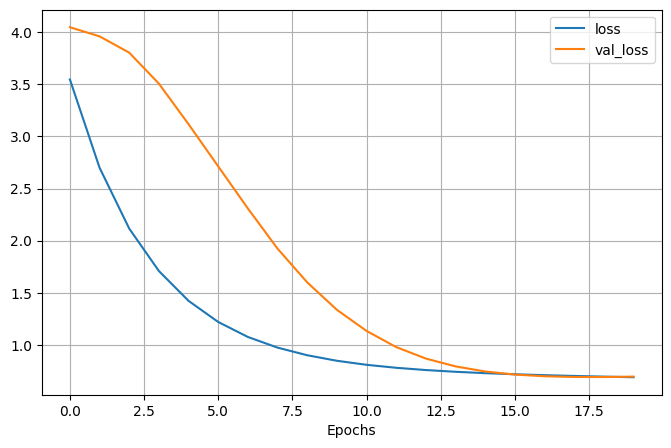

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 2)
plt.xlabel("Epochs")
plt.show()